In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def kernel(x1,x2,l):
    return np.exp(-1.0/l**2*(x1 - x2[:, None])**2)

def evalGP(X,A,l,x):
    K_xX = kernel(x,X,l)
    mu = K_xX.T @ A
    
    return mu

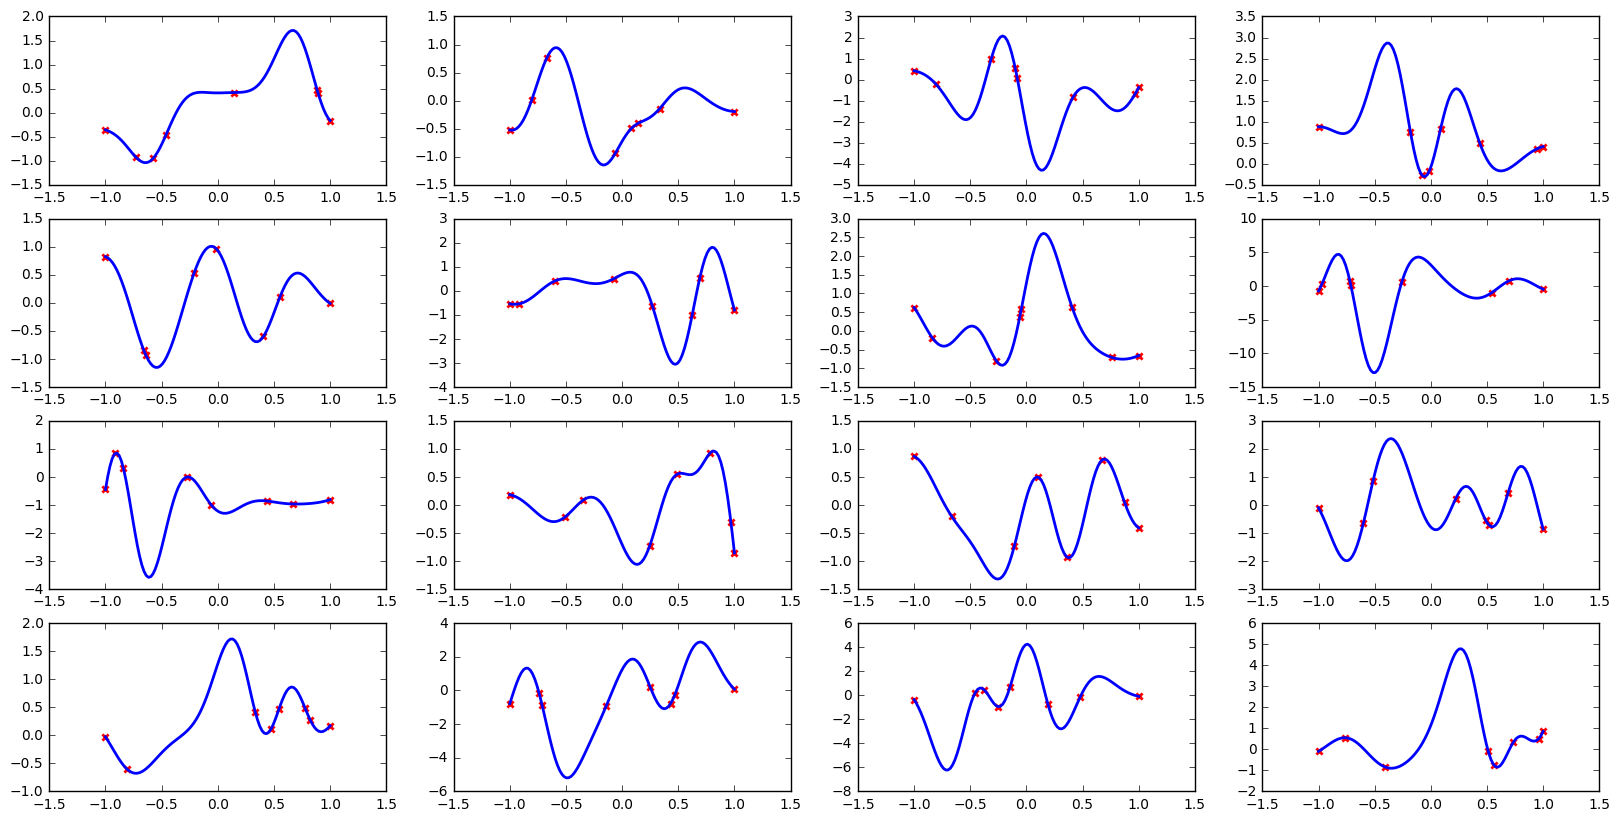

In [23]:
plt.figure(figsize=(20,10))
for i in range(16):
    # Create Random fixed points
    n_samples = 8
    X = np.random.uniform(low = -1.0, high = 1.0, size = n_samples)
    X[0] = -1.0
    X[-1] = 1.0
    Y = np.random.uniform(low = -1.0, high = 1.0, size = n_samples)
    l = 0.3

    # Compute and invert the GP Kernel Matrix
    K_XX = kernel(X,X,l)
    A = np.linalg.inv(K_XX) @ Y

    # Evaluate the GP on the data x
    x = np.linspace(-1,1,100)
    y = evalGP(X,A,l,x)

    plt.subplot(4,4,i+1)
    plt.plot(x,y,linewidth=2)
    plt.scatter(X,Y,marker="x",color="r",linewidth=2)


plt.show()